# Лабораторна робота №1

# Тема: Дослідження та візуалізація даних за допомогою Python

# Мета: отримати базові навики використання Python для дослідження та візуалізації даних.

<br>

<div style="background-color: white;">
Виконав: студент групи КН - 222c Максименко Валентин Михайлович 
</div>
<div style="background-color: white;">
Перевірив: асистент кафедри Герман Олександрович Зверцев
</div>

## Завдання

<br>

<div style="background-color: white;">
1. Встановіть Jupyter notebook через pip або Anaconda Distribution.
</div>
<div style="background-color: white;">
2. Завантажте russia_losses_equipment.csv файл з сайту Kaggle.com
</div>
<div style="background-color: white;">
3. Виберіть один варіант для цієї лабораторної роботи,
використовуючи формулу
</div>
<div style="background-color: white;">
N = ord("LLL") % 3 + 1,
де N – це номер варіанту, LLL – це перша літера вашого імені.
</div>

**Варіант 3. Дослідження втрат бронетранспортерів (БТР).**
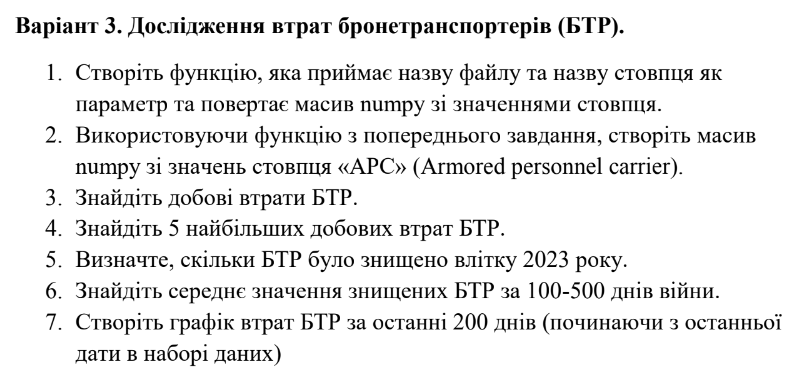

In [15]:
N = ord('V') % 3 + 1
print(N)

3


In [16]:
import numpy as np
import csv

def find_column(file_name, column_name):
    column_data = []
    with open(file_name, 'r') as file:
        csv_reader = csv.reader(file)
        headers = next(csv_reader)
        column_index = headers.index(column_name)
        for row in csv_reader:
            column_data.append(row[column_index])
    return np.array(column_data)

array_APS = find_column("russia_losses_equipment.csv", "APC").astype(int)
date_data = find_column("russia_losses_equipment.csv", "date").astype(np.datetime64)

print(array_APS)
print(date_data)


[  516   706   706   816   846   862   900   939   945   985   999  1036
  1070  1105  1165  1205  1226  1249  1279  1375  1435  1448  1470  1487
  1535  1556  1578  1597  1625  1640  1664  1694  1710  1723  1735  1751
  1776  1830  1844  1858  1861  1891  1891  1895  1911  1923  1946  1964
  1968  1976  1982  2002  2041  2063  2087  2118  2162  2205  2238  2258
  2308  2342  2389  2418  2445  2471  2519  2567  2610  2651  2686  2713
  2741  2764  2808  2856  2873  2900  2934  2958  2974  3009  3043  3063
  3090  3116  3141  3166  3194  3213  3235  3246  3258  3270  3282  3302
  3343  3354  3366  3379  3392  3400  3416  3429  3438  3450  3466  3484
  3492  3503  3528  3545  3563  3573  3577  3588  3606  3614  3632  3637
  3645  3659  3687  3704  3720  3726  3736  3737  3744  3744  3772  3789
  3797  3811  3815  3823  3828  3829  3832  3832  3866  3874  3879  3886
  3892  3905  3912  3920  3929  3942  3950  3959  3971  3979  3987  3995
  4004  4011  4014  4022  4026  4032  4051  4055  4

In [18]:
def findDayAPS(arr_APZ):
    temp_old = np.diff(arr_APZ)
    temp_new = np.insert(temp_old, 0, arr_APZ[0])
    return temp_new

day_APS = findDayAPS(array_APS)
print(day_APS)

[516 190   0 110  30  16  38  39   6  40  14  37  34  35  60  40  21  23
  30  96  60  13  22  17  48  21  22  19  28  15  24  30  16  13  12  16
  25  54  14  14   3  30   0   4  16  12  23  18   4   8   6  20  39  22
  24  31  44  43  33  20  50  34  47  29  27  26  48  48  43  41  35  27
  28  23  44  48  17  27  34  24  16  35  34  20  27  26  25  25  28  19
  22  11  12  12  12  20  41  11  12  13  13   8  16  13   9  12  16  18
   8  11  25  17  18  10   4  11  18   8  18   5   8  14  28  17  16   6
  10   1   7   0  28  17   8  14   4   8   5   1   3   0  34   8   5   7
   6  13   7   8   9  13   8   9  12   8   8   8   9   7   3   8   4   6
  19   4  15   6  10  14   8   7  11  15  11  10  17  16  17  12   6   8
   5   2   6   3   3  12  25  18  33  21  37  27  29  25  36  37  18   9
  33  23  22   3  17   8  11  17   2   4  24  28  20  11  25  25  24   8
  20  23  17  26  16  27  20  26  29  18  22  16  13  19 -14   5   7  14
  12  14  16  20   3   8  18  11  26  30  13  14  2

In [19]:
def findMaxDayAPS(arr_APZ):
    new_arr = findDayAPS(arr_APZ)
    temp = np.argpartition(new_arr, -5)[-5:]
    arr = new_arr[temp]
    return arr

print(findMaxDayAPS(array_APS))

[ 96 120 190 110 516]


In [20]:
def findAPSInSummer(data):
    start_date = np.datetime64("2023-06-01")
    end_date = np.datetime64("2023-08-31")
    return np.sum(data[(date_data > start_date) & (date_data <= end_date)])

print(findAPSInSummer(day_APS))

1126


In [21]:
def findAvgAps(arrAPS):
    startDay = 100 - 1
    endDay = 500
    tempAPS = findDayAPS(arrAPS[startDay:endDay])
    return np.mean(tempAPS)

print(findAvgAps(array_APS))

19.860349127182044


None


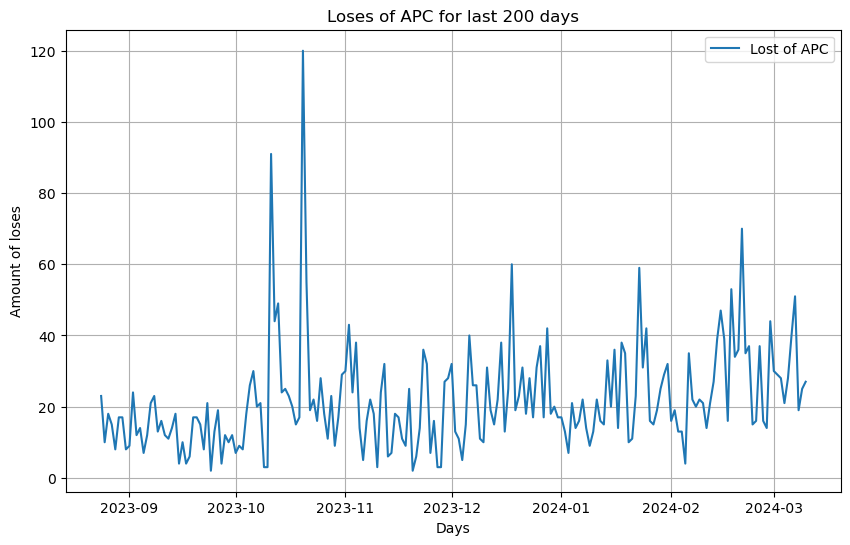

In [22]:
import matplotlib.pyplot as plt
    
def drawPlot():
    plt.figure(figsize = (10,6))
    plt.plot(date_data[-200:], day_APS[-200:], label = 'Lost of APC')
    plt.xlabel('Days')
    plt.ylabel('Amount of loses')
    plt.title('Loses of APC for last 200 days')
    plt.legend()
    plt.grid(True)
    plt.savefig('aps_data.png', format = 'png')
    
print(drawPlot())



**Висновки:** У результаті виконання лабораторної роботи ми отримали базові навички роботи з аналізом та візуалізацією даних за допомогою Python. Було розроблено та виконано функції для обробки та аналізу даних про втрати бронетранспортерів, а також побудовано відповідні графіки, що дозволило краще зрозуміти динаміку втрат у війні.